In [2]:
import nltk
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import json

In [3]:
file = "/Users/kalyani/01ColumbiaQMSS/RA_Carnegie/APP/trump_files/trump_allspeeches.json"
with open(file) as f:
    data_t = json.loads(f.read())


## Dict to store stats on speeches referencing different countries and trade 
    Nested dict that stores stats on the number of times the words trade, China, Canada, Mexico, 
    Japan, Germany, NAFTA are mentioned.
    Stats on the number of times trade and China, trade and Japan, trade and Canada, trade and Mexico, trade and 
    Japan, trade and Germany are mentioned together 
    Mentions keyed by speech number, president and categories
    
    Args: 
    Nested dict of speeches

In [4]:

dict1 = {}
total = []
trade = []
china = []
japan = []
mexico = []
canada = []
germany = []
korea = []
NAFTA = []
trade_china = []
trade_japan = []
trade_mexico = []
trade_canada = []
trade_germany = []
    
for x in data_t:
    if 'Press Releases' not in data_t[x]["category"]:
        total.append(data_t[x]['text'])
        if 'trade' in data_t[x]['text']:
            trade.append([data_t[x]['text']])
        dict1['trade'] = len(trade)
        if 'Canada' in data_t[x]['text']:
            canada.append([data_t[x]['text']])
        dict1['canada'] = len(canada)
        if 'China' in data_t[x]['text']:
            china.append([data_t[x]['text']])
        dict1['china'] = len(china)
        if 'Mexico' in data_t[x]['text']:
            mexico.append([data_t[x]['text']])
        dict1['mexico'] = len(mexico)
        if 'Japan' in data_t[x]['text']:
            japan.append([data_t[x]['text']])
        dict1['japan'] = len(japan)
        if 'Germany' in data_t[x]['text']:
            germany.append([data_t[x]['text']])
        dict1['germany'] = len(germany)
        if 'South Korea' in data_t[x]['text']:
            korea.append([data_t[x]['text']])
        dict1['korea'] = len(korea)
        if 'NAFTA' in data_t[x]['text']:
            NAFTA.append([data_t[x]['text']])
        dict1['NAFTA'] = len(NAFTA)
        if 'trade' in data_t[x]['text'] and 'China' in data_t[x]['text']:
            trade_china.append([data_t[x]['text']])
        dict1['trade_china'] = len(trade_china)
        if 'trade' in data_t[x]['text'] and 'Mexico' in data_t[x]['text']:
            trade_mexico.append([data_t[x]['text']])
        dict1['trade_mexico'] = len(trade_mexico) 
        if 'trade' in data_t[x]['text'] and 'Canada' in data_t[x]['text']:
            trade_canada.append([data_t[x]['text']])
        dict1['trade_canada'] = len(trade_canada)
        if 'trade' in data_t[x]['text'] and 'Japan' in data_t[x]['text']:
            trade_japan.append([data_t[x]['text']])
        dict1['trade_japan'] = len(trade_japan)
        if 'trade' in data_t[x]['text'] and 'Germany' in data_t[x]['text']:
            trade_germany.append([data_t[x]['text']])
        dict1['trade_germany'] = len(trade_germany)
        if 'trade' in data_t[x]['text'] and 'Japan' in data_t[x]['text']:
            trade_japan.append([data_t[x]['text']])
        dict1['trade_japan'] = len(trade_japan)
        if 'trade' in data_t[x]['text'] and 'Canada' in data_t[x]['text']:
            trade_canada.append([data_t[x]['text']])
        dict1['trade_canada'] = len(trade_canada)
dict1['total'] = len(total)
    

In [5]:
dict1

{'trade': 276,
 'canada': 46,
 'china': 190,
 'mexico': 121,
 'japan': 75,
 'germany': 30,
 'korea': 66,
 'NAFTA': 107,
 'trade_china': 148,
 'trade_mexico': 86,
 'trade_canada': 70,
 'trade_japan': 114,
 'trade_germany': 24,
 'total': 795}

## Proportion of mentions over total speeches - table and graph

In [6]:
list_prop = [t/795 for t in dict1.values()]
list_prop = list_prop[:-1]
list_keys = list(dict1.keys())[:-1]




list_prop = [x*100 for x in list_prop]


df = pd.DataFrame({'Word' : list_keys, 'Percentage' : list_prop}) 
df = df.sort_values("Percentage", ascending = False)
display(df)
df.to_clipboard()

,Word,Percentage
0,trade,34.716981
2,china,23.899371
8,trade_china,18.616352
3,mexico,15.220126
11,trade_japan,14.339623
7,NAFTA,13.459119
9,trade_mexico,10.817610
4,japan,9.433962
10,trade_canada,8.805031
6,korea,8.301887


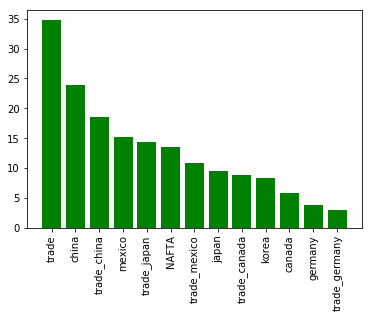

<Figure size 21600x14400 with 0 Axes>

In [10]:
import seaborn as sns
plt.bar(x = df['Word'], height = df['Percentage'], color = 'green')
plt.xticks(rotation = 'vertical')

plt.figure( figsize=(300,200) )
plt.show()


## Analysis of word frequency in sentences

Analysing which words occur most frequently in sentences with 'Trade', 'China' etc.

In [6]:
with open("/Users/kalyani/01ColumbiaQMSS/RA_Carnegie/APP/trump_files/speeches_textonly.txt", "w") as f:
    f.write("")

for x in data_t:
    if 'Press Releases' not in data_t[x]["category"]:
        with open("/Users/kalyani/01ColumbiaQMSS/RA_Carnegie/APP/trump_files/speeches_textonly.txt", "a") as f: 
            f.write(data_t[x]["text"])
            f.write("\n")
        

In [7]:
f=open('/Users/kalyani/01ColumbiaQMSS/RA_Carnegie/APP/trump_files/trumpspeeches_textonly.txt','r')
raw=f.read()
tokens = nltk.word_tokenize(raw)
text = nltk.Text(tokens)

In [38]:
def Freq_dict_in_sentence(word = "China", raw = raw):
    """
    Accepts raw text from file. Lemmatizes words, lowercases words, and removes stopwords. 
    Returns frequency dictionary for sentences in which word occurs.
    Arg:
    word (string) : word to search for
    raw (string) : from file
    
    Returns:
    
    
    """
    from nltk.stem import WordNetLemmatizer
    from nltk.corpus import stopwords
    import re
    from nltk import FreqDist
    sents = nltk.sent_tokenize(raw)
    sents_word = []
    for sent in sents:
        if word in sent:
            sents_word.append(sent)
    tokens = nltk.word_tokenize(str(sents_word))
    tokens = [t.lower() for t in tokens]
    print("length of sents ", len(sents_word))
    stop_words = set(stopwords.words('english'))
    words1 = [w for w in tokens if not w in stop_words] 
    bad_words = [w for w in words_china if re.search('[@\`!$%&(),-\./0123456789_–?\[\]\x27\’\:;]', w)]
    words1 = [w for w in words_china if w not in bad_words]
    lemmatizer = WordNetLemmatizer()
    words1_L = []
    for t in words1:
        k = lemmatizer.lemmatize(t)
        words_chinal.append(k)
    fdist = FreqDist(words1_L)
    return fdist_china

    
    
        
    

Perform analysis for:
1) trade
2) China
3) Mexico
4) Japan
5) NAFTA
6) South Korea
7) Germany
8) Canada
    

In [9]:
def freq_dist_mostcommon(word, number = 5):
    fd = Freq_dict_in_sentence(word, raw)
    return fd.most_common(number)

In [14]:
def fd_plot(word, number):
    fd = Freq_dict_in_sentence(word, raw)
    fd[word] = 0
    fd.plot(number, cumulative = False) 
    plt.figure( figsize=(500,300) )

    

In [36]:
freq_dist_mostcommon("trade", 100)

length of sents  1026


[('trade', 1096),
 ('deal', 306),
 ('I', 242),
 ('going', 175),
 ('deficit', 155),
 ('country', 154),
 ('job', 127),
 ('American', 97),
 ('fair', 95),
 ('billion', 94),
 ('United', 76),
 ('States', 76),
 ('We', 74),
 ('many', 73),
 ('China', 69),
 ('also', 69),
 ('u', 65),
 ('year', 64),
 ('people', 62),
 ('Korea', 61),
 ('policy', 60),
 ('tax', 56),
 ('President', 56),
 ('great', 54),
 ('world', 54),
 ('worker', 54),
 ('free', 53),
 ('economic', 53),
 ('good', 53),
 ('want', 51),
 ('And', 51),
 ('terrible', 46),
 ('foreign', 46),
 ('make', 45),
 ('America', 45),
 ('energy', 43),
 ('agreement', 42),
 ('thing', 42),
 ('new', 41),
 ('Clinton', 41),
 ('said', 41),
 ('one', 41),
 ('reciprocal', 41),
 ('relationship', 40),
 ('lot', 39),
 ('open', 38),
 ('regulation', 36),
 ('every', 35),
 ('NAFTA', 35),
 ('know', 34),
 ('made', 34),
 ('renegotiate', 34),
 ('North', 34),
 ('issue', 34),
 ('important', 34),
 ('massive', 33),
 ('immigration', 33),
 ('Mexico', 31),
 ('Hillary', 31),
 ('work', 3

length of sents  1026


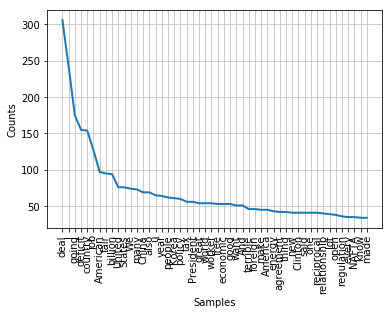

<Figure size 36000x21600 with 0 Axes>

In [15]:
fd_plot("trade", 50)

In [39]:
freq_dist_mostcommon("China", 100)

length of sents  720


[('china', 677),
 ('trade', 133),
 ('state', 97),
 ('country', 96),
 ('president', 85),
 ('united', 82),
 ('world', 74),
 ('korea', 74),
 ('u', 66),
 ('russia', 55),
 ('north', 52),
 ('going', 52),
 ('job', 51),
 ('people', 45),
 ('organization', 45),
 ('many', 43),
 ('like', 41),
 ('deal', 40),
 ('think', 40),
 ('said', 39),
 ('since', 39),
 ('relationship', 38),
 ('great', 36),
 ('know', 35),
 ('xi', 35),
 ('lost', 34),
 ('south', 33),
 ('year', 32),
 ('billion', 31),
 ('japan', 30),
 ('nafta', 30),
 ('relation', 27),
 ('percent', 27),
 ('also', 27),
 ('clinton', 26),
 ('good', 26),
 ('time', 25),
 ('respect', 25),
 ('factory', 25),
 ('\\nq', 25),
 ('america', 24),
 ('look', 24),
 ('want', 24),
 ('would', 24),
 ('even', 23),
 ('bill', 23),
 ('say', 22),
 ('american', 22),
 ('deficit', 22),
 ('trump', 22),
 ('business', 22),
 ('get', 21),
 ('mexico', 21),
 ('really', 21),
 ('including', 21),
 ('one', 20),
 ('come', 19),
 ('another', 19),
 ('lot', 19),
 ('hillary', 18),
 ('along', 18),